# FLIGHT PRICE PREDICTION PROJECT


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel("C:/Users/Shiva Labade/Documents/Internship project/Flight Price Prediction Project Excel sheet.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Examining The Data


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [9]:
df.shape

(2671, 10)

Dataset contains 2671 rows and 10 columns



In [10]:
df.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [11]:
df.Additional_Info.unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

Target/dependent variables is discrete and categorial in nature



In [12]:
df.loc[df['Additional_Info']==" "]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [13]:
df["Additional_Info"]=df["Additional_Info"].replace(" ",np.nan)


In [14]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [15]:
df.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [16]:
df_visualization_nominal=df[["Airline","Date_of_Journey","Source","Destination","Route","Dep_Time","Arrival_Time","Duration","Total_Stops"]].copy()


In [17]:
df_visualization_nominal.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

Dataset Visualization 


Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


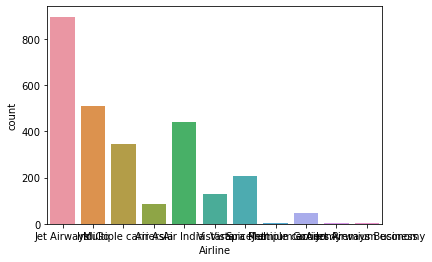

In [18]:
ax = sns.countplot(x="Airline",data=df_visualization_nominal)
print(df_visualization_nominal["Airline"].value_counts())

Here countplot contains the data visualization of nominal columns of Airline



9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
24/03/2019     78
1/04/2019      78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
3/04/2019      28
06/03/2019     28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
18/06/2019     22
21/04/2019     22
24/04/2019     21
09/03/2019     21
27/04/2019     15
6/04/2019      14
1/03/2019      12
18/04/2019     12
12/04/2019     11
Name: Date_of_Journey, dtype: int64


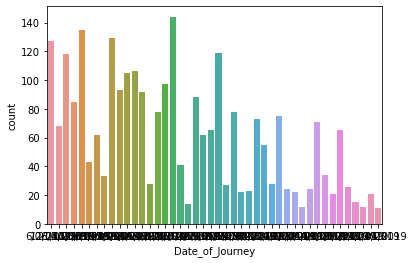

In [19]:
ax = sns.countplot(x="Date_of_Journey",data=df_visualization_nominal)
print(df_visualization_nominal["Date_of_Journey"].value_counts())


Here countplot contains the data visualization of nominal columns of Data_Of_Journey



Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


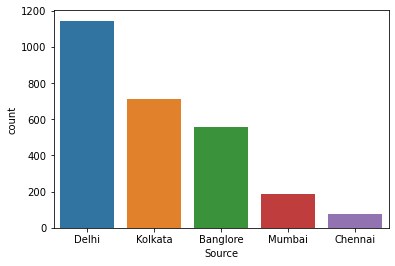

In [20]:
ax = sns.countplot(x="Source",data=df_visualization_nominal)
print(df_visualization_nominal["Source"].value_counts())

Here countplot contains the data visualization of nominal columns of Source



Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


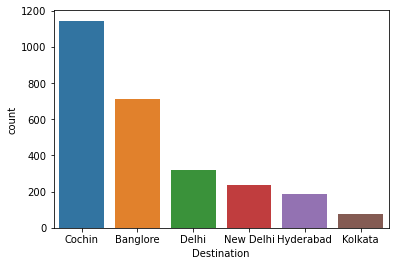

In [21]:
ax = sns.countplot(x="Destination",data=df_visualization_nominal)
print(df_visualization_nominal["Destination"].value_counts())


Here countplot contains the data visualization of nominal columns of Destination



DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HYD                            164
                                    ... 
CCU → BBI → IXR → DEL → BLR            1
BLR → CCU → BBI → HYD → VGA → DEL      1
BLR → GOI → DEL                        1
BLR → BOM → IDR → GWL → DEL            1
BOM → IXC → DEL → HYD                  1
Name: Route, Length: 100, dtype: int64


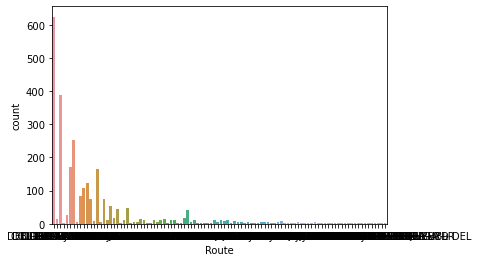

In [22]:
ax = sns.countplot(x="Route",data=df_visualization_nominal)
print(df_visualization_nominal["Route"].value_counts())

Here countplot contains the data visualization of nominal columns of Route



10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
15:40     1
18:35     1
12:10     1
09:20     1
06:25     1
Name: Dep_Time, Length: 199, dtype: int64


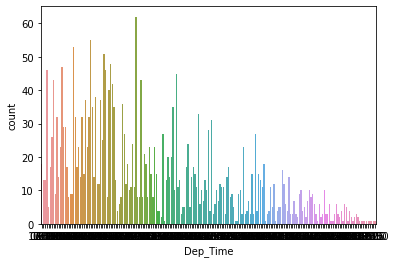

In [23]:
ax = sns.countplot(x="Dep_Time",data=df_visualization_nominal)
print(df_visualization_nominal["Dep_Time"].value_counts())


Here countplot contains the data visualization of nominal columns of Dep_Time



19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
22:55 10 Jun      1
19:15 07 Jun      1
01:20 25 Apr      1
00:15 19 May      1
05:25 07 Jun      1
Name: Arrival_Time, Length: 704, dtype: int64


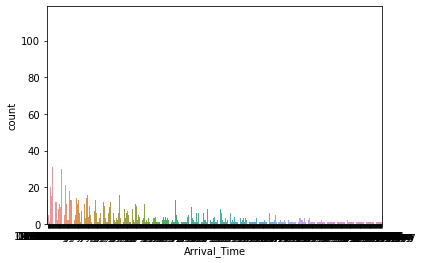

In [24]:
ax = sns.countplot(x="Arrival_Time",data=df_visualization_nominal)
print(df_visualization_nominal["Arrival_Time"].value_counts())


Here countplot contains the data visualization of nominal columns of Arrival_Time



2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
9h 55m       1
31h 55m      1
33h 20m      1
20h 30m      1
19h 15m      1
Name: Duration, Length: 320, dtype: int64


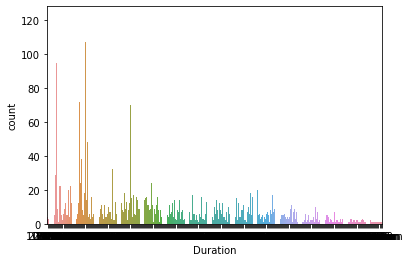

In [25]:
ax = sns.countplot(x="Duration",data=df_visualization_nominal)
print(df_visualization_nominal["Duration"].value_counts())

Here countplot contains the data visualization of nominal columns of Duration



1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


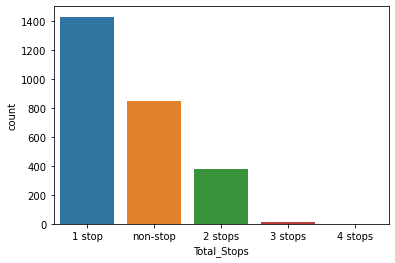

In [26]:
ax = sns.countplot(x="Total_Stops",data=df_visualization_nominal)
print(df_visualization_nominal["Total_Stops"].value_counts())

Here countplot contains the data visualization of nominal columns of Total_Stops



Making dataframe of the ordinal data


In [27]:
df_visualization_ordinal=df[["Airline","Source"]].copy()

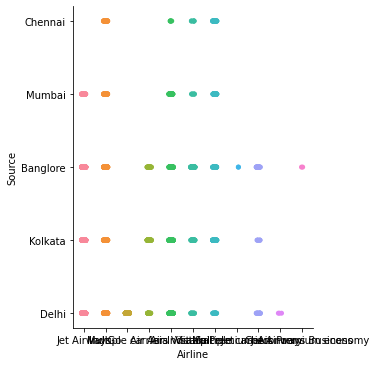

In [28]:
sns.catplot(x="Airline",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Airline and y=Source



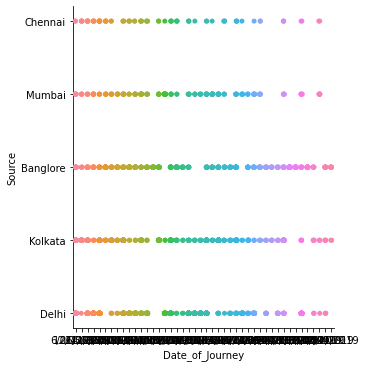

In [29]:
sns.catplot(x="Date_of_Journey",y="Source",data=df)


Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Data_of_journey and y=Source



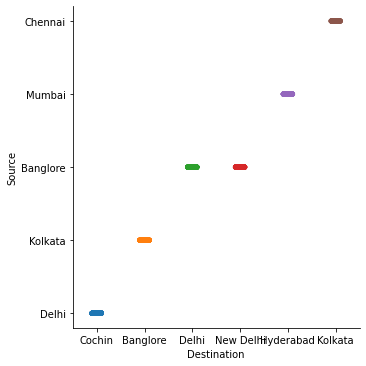

In [30]:
sns.catplot(x="Destination",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Destination and y=Source



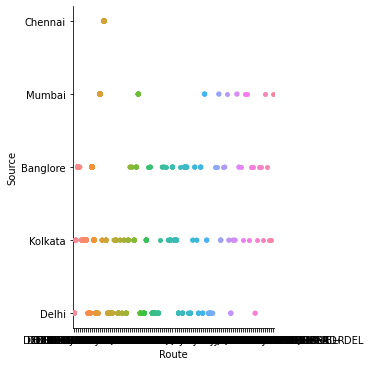

In [31]:
sns.catplot(x="Route",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Route and y=Source



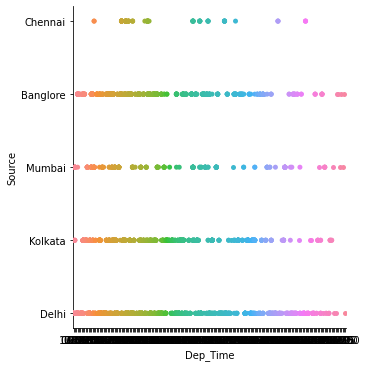

In [33]:
sns.catplot(x="Dep_Time",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Dep_Time and y=Source



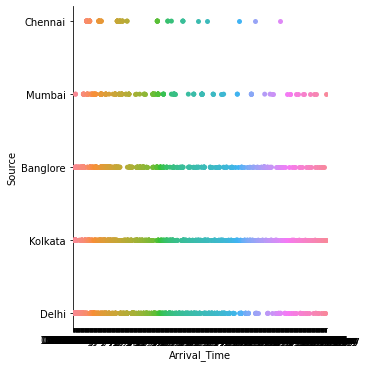

In [34]:
sns.catplot(x="Arrival_Time",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Airrival_Time and y=Source



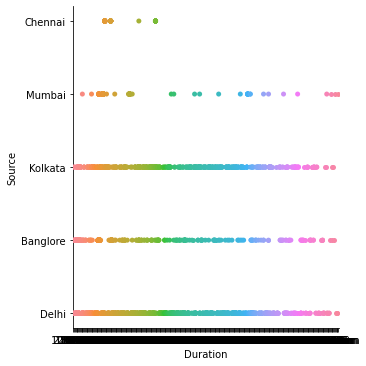

In [35]:
sns.catplot(x="Duration",y="Source",data=df)



Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Duration and y=Source



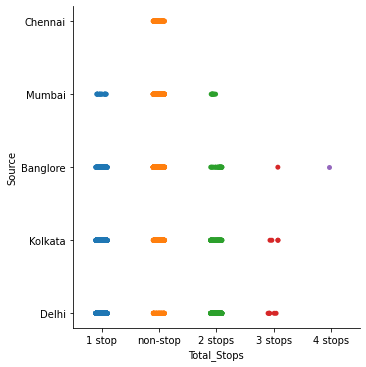

In [36]:
sns.catplot(x="Total_Stops",y="Source",data=df)


Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Total_Stops and y=Source



checking the distribution of the continuous value of the object type columns


In [37]:
df_visualization_continuous=df[["Total_Stops","Additional_Info","Duration","Arrival_Time","Airline","Source"]].copy()


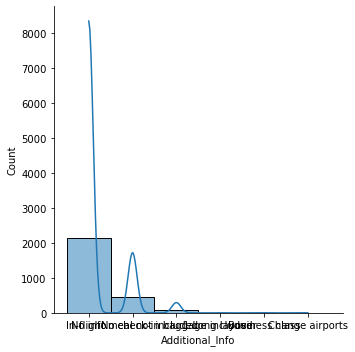

In [38]:
sns.displot(df_visualization_continuous['Additional_Info'], kde=True)


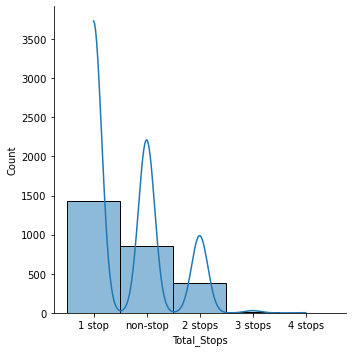

In [39]:
sns.displot(df_visualization_continuous['Total_Stops'], kde=True)

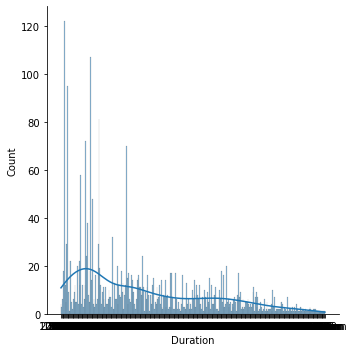

In [40]:
sns.displot(df_visualization_continuous['Duration'], kde=True)


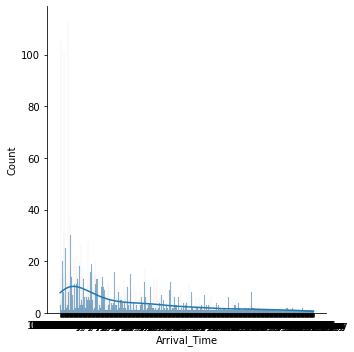

In [41]:
sns.displot(df_visualization_continuous['Arrival_Time'], kde=True)


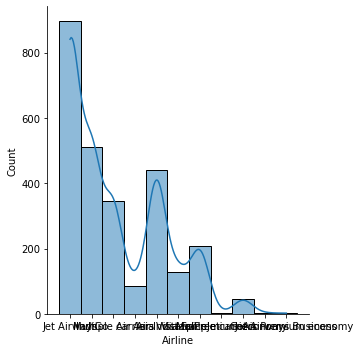

In [42]:
sns.displot(df_visualization_continuous['Airline'], kde=True)


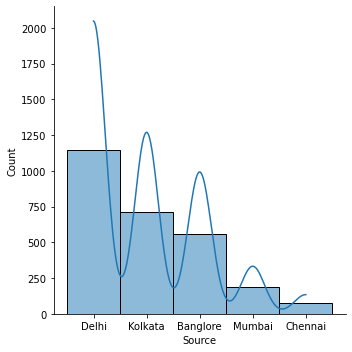

In [43]:
sns.displot(df_visualization_continuous['Source'], kde=True)


Data is not normally distributed in this columns,because of viscous problem.



Encoding Method


In [44]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])

In [45]:
df.Additional_Info.unique()

array([5, 3, 4, 0, 1, 2])

In [46]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])

In [48]:
df.Airline.unique()

array([ 4,  3,  6,  0,  1,  9,  8, 10,  2,  7,  5])

In [49]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [50]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Date_of_Journey']=LE.fit_transform(df['Date_of_Journey'])

In [51]:
df.Date_of_Journey.unique()

array([39, 10, 22, 27, 11,  8,  6, 12, 18, 20, 15, 14, 35,  2, 24, 36, 42,
       16, 37,  7, 32, 28, 43, 34,  5, 19, 13, 38, 40, 33, 31, 23, 21, 17,
       41, 26,  0,  3, 30,  1, 29,  4, 25,  9])

In [55]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,22,2,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,27,0,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Source']=LE.fit_transform(df['Source'])

In [54]:
df.Source.unique()

array([2, 3, 0, 4, 1])

In [57]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,22,2,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,27,0,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [58]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Destination']=LE.fit_transform(df['Destination'])
df.Destination.unique()

array([1, 0, 2, 5, 3, 4])

In [59]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,0,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,22,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,1,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,27,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Route']=LE.fit_transform(df['Route'])
df.Route.unique()

array([76, 65, 16, 24, 57, 43, 45, 92, 83,  5, 51, 88, 74, 33, 68, 99, 46,
       75, 84, 93, 60, 50, 78, 62, 91, 58, 77, 56, 15, 10, 40,  0, 30, 80,
       87, 82, 52, 18,  4, 85, 70, 96, 94, 67, 20,  8,  6, 69, 39, 21, 61,
       47, 72, 25, 73, 19,  3, 79, 71, 48, 23, 64, 97, 14, 98, 29, 44, 89,
       95, 81,  7,  2, 36, 55, 11,  1, 37, 54, 90, 63, 66, 35, 13, 27, 49,
       31, 34, 53, 17,  9, 86, 41, 26, 22, 38, 28, 12, 42, 59, 32])

In [61]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,0,65,06:20,10:20,4h,1 stop,5
2,4,22,2,1,76,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,1,76,08:00,21:00,13h,1 stop,5
4,0,27,0,2,16,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [62]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Dep_Time']=LE.fit_transform(df['Dep_Time'])
df.Dep_Time.unique()

array([138,  31, 156,  48, 198, 146,  44, 116,  70, 127, 101,  36,  58,
        24, 181,  96,  68, 193,  75, 164,  21, 177, 124, 102, 192, 162,
        40,  26, 132, 152,  71, 135,  93, 191, 176, 141,  62, 103,  66,
         5,  84, 133,  27,  39, 130, 160,  10, 179,  82,  88, 183,  25,
        47,  59,  51,  63,  69, 112, 186,  38, 163, 158, 113,  22,  34,
       136, 180,  45,  37, 139,  79, 167, 169,  23, 114, 175, 107, 161,
        52, 184, 178,   6,  53, 172, 105, 109,  78, 159, 117,  29, 188,
        54, 110,  65,   3,  56, 154,  57,  83,  15, 104,  64, 142, 121,
         9,   1, 153, 195,  81,  20,  19,  91,  35, 145,  98,  61,   7,
       197,  46,  87, 168,  50, 137,  67, 122,  74, 108,  33,  86, 155,
       173, 115, 131, 128,  73,  13,  11,  12, 148, 119, 157,  95,  94,
        60, 170,  90,  77,  55,  42, 111,  76,  16, 123, 118, 165, 151,
       125, 196, 129,  41,  97,  28, 174,  80,  30, 144, 150,  92,  18,
       185,  43,  17, 189,  14, 147, 140,   2,  85, 187, 120, 10

In [63]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,0,65,31,10:20,4h,1 stop,5
2,4,22,2,1,76,156,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,1,76,48,21:00,13h,1 stop,5
4,0,27,0,2,16,198,02:45 25 Jun,2h 50m,non-stop,5


In [64]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Arrival_Time']=LE.fit_transform(df['Arrival_Time'])
df.Arrival_Time.unique()


array([150, 353, 566, 633, 135, 432, 662, 620, 442, 554, 488, 577, 355,
       428, 258, 661, 657, 157, 263, 119, 344, 287, 555, 702, 161, 516,
        87, 122, 427, 674, 274, 678, 410, 598, 111,  32, 230, 125, 610,
       548, 481, 663, 455, 603, 499, 399, 408, 527, 240, 570, 419, 549,
       318, 660, 659, 485, 218,  34, 546, 449, 565, 647, 484, 366, 398,
       421, 190, 517, 347,  83, 289, 107, 363, 261, 267, 535, 578, 624,
       220, 158, 211, 539, 350, 120, 600, 345,  68, 640, 324, 658, 590,
       538, 109, 151, 619, 357, 461, 276, 611, 431, 507, 597, 138, 440,
       493, 189, 379, 667, 403, 323,  36, 504, 177, 266,  16, 607, 412,
       634, 482, 518, 278,  62, 510, 508,  30, 143, 365, 542, 621,  64,
       648, 382, 103,  65, 316, 474, 581, 460, 390, 162, 249, 377, 509,
       395, 381, 255, 224, 506, 116, 104, 483, 650, 334,  85, 606, 144,
       254, 137, 616,  75, 388, 467, 685, 106, 329, 115, 148, 595, 639,
       437, 463, 282, 141, 622, 127, 438,  40, 691, 194, 464,  7

In [65]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10h 55m,1 stop,5
1,3,10,3,0,65,31,353,4h,1 stop,5
2,4,22,2,1,76,156,566,23h 45m,1 stop,3
3,6,22,2,1,76,48,633,13h,1 stop,5
4,0,27,0,2,16,198,135,2h 50m,non-stop,5


In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Duration']=LE.fit_transform(df['Duration'])
df['Total_Stops']=LE.fit_transform(df['Total_Stops'])
df.Duration.unique()

array([ 10, 248, 148,  36, 216,  93,  69, 261, 215, 283, 202, 311,   2,
       254,  83,   9, 310,  26, 309,  55,  57,  18,  41,  28, 212, 168,
       102, 284,  19, 295, 241, 110, 214,  90,   7,  29, 111, 147, 210,
       146, 191, 199, 267, 179, 266, 209, 217, 289, 262, 172,  38, 178,
       263, 304, 287, 122,  70, 293,  81, 269,  44,  22,  39,  92, 197,
       259, 143, 108, 109,  40, 274,   1, 253,  12,  27,  59,  99,  43,
       317, 213, 286, 141,   4, 270, 137, 303,  17,  65, 294,  33, 167,
         3, 301,  32,  25, 135, 292, 129, 277, 211, 171, 230,  16,  60,
        51, 296, 123, 183,  79, 319,  78,  14, 139,  88, 142, 166, 149,
        50, 161,   5, 104, 275, 188, 312, 260, 291, 278, 201,  52, 106,
       236, 255, 276, 127, 246, 257,  71, 280,  20, 272, 134, 100, 152,
        53, 118,  72, 298, 300, 151, 103, 165, 125, 256,  94, 258,  77,
       196, 162, 282, 299, 175, 308, 121, 144, 190, 126,  63,  47, 200,
        54,  13, 113, 154,  24, 114, 192, 119,  23,  30, 164,   

In [67]:
df.Total_Stops.unique()


array([0, 4, 1, 2, 3])

In [68]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5


Importing The Dataset


In [70]:
df = pd.read_excel("C:/Users/Shiva Labade/Documents/Internship project/Flight Price Prediction Project Excel sheet.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [71]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Here Route and Total_Stops contains sum values and remaining values will be zero



In [76]:
df.describe()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


Correlation of the columns with the target columns


In [79]:
df.corr()


""


In [81]:
df.skew()


Series([], dtype: float64)

Dataset contains skew value



Outlier Check


In [82]:
df.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [84]:
df.shape


(2671, 10)

Dataset contains 2671 rows and 10 columns



In [86]:
sns.pairplot


<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

considering the outlier removal


In [87]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [88]:
df.shape


(2671, 9)

In [89]:
df.columns


Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info'],
      dtype='object')

Encoding Method


In [90]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])

In [91]:
df.Airline.unique()

array([ 4,  3,  6,  0,  1,  9,  8, 10,  2,  7,  5])

In [92]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,3,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,4,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,6,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,0,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [93]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Source']=LE.fit_transform(df['Source'])

In [94]:
df.Source.unique()

array([2, 3, 0, 4, 1])

In [95]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,3,3,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,4,2,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,6,2,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,0,0,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [96]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Destination']=LE.fit_transform(df['Destination'])

In [97]:
df.Destination.unique()

array([1, 0, 2, 5, 3, 4])

In [98]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,3,3,0,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,4,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,6,2,1,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,0,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [99]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Arrival_Time']=LE.fit_transform(df['Arrival_Time'])
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2,1,DEL → BOM → COK,17:30,150,10h 55m,1 stop,No info
1,3,3,0,CCU → MAA → BLR,06:20,353,4h,1 stop,No info
2,4,2,1,DEL → BOM → COK,19:15,566,23h 45m,1 stop,In-flight meal not included
3,6,2,1,DEL → BOM → COK,08:00,633,13h,1 stop,No info
4,0,0,2,BLR → DEL,23:55,135,2h 50m,non-stop,No info


In [100]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])
df.Additional_Info.unique()

array([5, 3, 4, 0, 1, 2])

In [101]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2,1,DEL → BOM → COK,17:30,150,10h 55m,1 stop,5
1,3,3,0,CCU → MAA → BLR,06:20,353,4h,1 stop,5
2,4,2,1,DEL → BOM → COK,19:15,566,23h 45m,1 stop,3
3,6,2,1,DEL → BOM → COK,08:00,633,13h,1 stop,5
4,0,0,2,BLR → DEL,23:55,135,2h 50m,non-stop,5


In [102]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Duration']=LE.fit_transform(df['Duration'])
df.Duration.unique()

array([ 10, 248, 148,  36, 216,  93,  69, 261, 215, 283, 202, 311,   2,
       254,  83,   9, 310,  26, 309,  55,  57,  18,  41,  28, 212, 168,
       102, 284,  19, 295, 241, 110, 214,  90,   7,  29, 111, 147, 210,
       146, 191, 199, 267, 179, 266, 209, 217, 289, 262, 172,  38, 178,
       263, 304, 287, 122,  70, 293,  81, 269,  44,  22,  39,  92, 197,
       259, 143, 108, 109,  40, 274,   1, 253,  12,  27,  59,  99,  43,
       317, 213, 286, 141,   4, 270, 137, 303,  17,  65, 294,  33, 167,
         3, 301,  32,  25, 135, 292, 129, 277, 211, 171, 230,  16,  60,
        51, 296, 123, 183,  79, 319,  78,  14, 139,  88, 142, 166, 149,
        50, 161,   5, 104, 275, 188, 312, 260, 291, 278, 201,  52, 106,
       236, 255, 276, 127, 246, 257,  71, 280,  20, 272, 134, 100, 152,
        53, 118,  72, 298, 300, 151, 103, 165, 125, 256,  94, 258,  77,
       196, 162, 282, 299, 175, 308, 121, 144, 190, 126,  63,  47, 200,
        54,  13, 113, 154,  24, 114, 192, 119,  23,  30, 164,   

In [103]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2,1,DEL → BOM → COK,17:30,150,10,1 stop,5
1,3,3,0,CCU → MAA → BLR,06:20,353,248,1 stop,5
2,4,2,1,DEL → BOM → COK,19:15,566,148,1 stop,3
3,6,2,1,DEL → BOM → COK,08:00,633,36,1 stop,5
4,0,0,2,BLR → DEL,23:55,135,216,non-stop,5


In [104]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Dep_Time']=LE.fit_transform(df['Dep_Time'])
df.Dep_Time.unique()

array([138,  31, 156,  48, 198, 146,  44, 116,  70, 127, 101,  36,  58,
        24, 181,  96,  68, 193,  75, 164,  21, 177, 124, 102, 192, 162,
        40,  26, 132, 152,  71, 135,  93, 191, 176, 141,  62, 103,  66,
         5,  84, 133,  27,  39, 130, 160,  10, 179,  82,  88, 183,  25,
        47,  59,  51,  63,  69, 112, 186,  38, 163, 158, 113,  22,  34,
       136, 180,  45,  37, 139,  79, 167, 169,  23, 114, 175, 107, 161,
        52, 184, 178,   6,  53, 172, 105, 109,  78, 159, 117,  29, 188,
        54, 110,  65,   3,  56, 154,  57,  83,  15, 104,  64, 142, 121,
         9,   1, 153, 195,  81,  20,  19,  91,  35, 145,  98,  61,   7,
       197,  46,  87, 168,  50, 137,  67, 122,  74, 108,  33,  86, 155,
       173, 115, 131, 128,  73,  13,  11,  12, 148, 119, 157,  95,  94,
        60, 170,  90,  77,  55,  42, 111,  76,  16, 123, 118, 165, 151,
       125, 196, 129,  41,  97,  28, 174,  80,  30, 144, 150,  92,  18,
       185,  43,  17, 189,  14, 147, 140,   2,  85, 187, 120, 10

In [105]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2,1,DEL → BOM → COK,138,150,10,1 stop,5
1,3,3,0,CCU → MAA → BLR,31,353,248,1 stop,5
2,4,2,1,DEL → BOM → COK,156,566,148,1 stop,3
3,6,2,1,DEL → BOM → COK,48,633,36,1 stop,5
4,0,0,2,BLR → DEL,198,135,216,non-stop,5


In [106]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info'],
      dtype='object')

In [107]:
df.drop(['Route','Total_Stops'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info
0,4,2,1,138,150,10,5
1,3,3,0,31,353,248,5
2,4,2,1,156,566,148,3
3,6,2,1,48,633,36,5
4,0,0,2,198,135,216,5


Missing Value Handaling Method


In [108]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
dtype: int64

In [109]:
df["Airline"]=df["Airline"].fillna(df["Airline"].mean())
df["Source"]=df["Source"].fillna(df["Source"].median())

Checking Skewness

In [110]:
df.skew()

Airline            0.483882
Source            -0.424997
Destination        1.263630
Dep_Time           0.178928
Arrival_Time      -0.523661
Duration          -0.275404
Additional_Info   -1.719119
dtype: float64

Removing The Outliers


In [111]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.01190758, 0.03256662, 0.29488167, ..., 1.47808348, 1.69830361,
        0.48039397],
       [0.42377921, 0.87708559, 0.97622158, ..., 0.4274359 , 0.83658895,
        0.48039397],
       [0.01190758, 0.03256662, 0.29488167, ..., 0.67496772, 0.22849195,
        2.14897547],
       ...,
       [0.01190758, 0.03256662, 0.29488167, ..., 1.47290787, 1.15611322,
        0.48039397],
       [1.29515278, 0.03256662, 0.29488167, ..., 0.73189937, 1.16576315,
        0.48039397],
       [0.88328115, 0.03256662, 0.29488167, ..., 0.73189937, 1.28292205,
        0.48039397]])

In [112]:
threshold=3
print(np.where(z>3))

(array([ 954, 1802, 1861], dtype=int64), array([6, 6, 6], dtype=int64))


In [113]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info
0,4,2,1,138,150,10,5
1,3,3,0,31,353,248,5
2,4,2,1,156,566,148,3
3,6,2,1,48,633,36,5
4,0,0,2,198,135,216,5
...,...,...,...,...,...,...,...
2666,1,3,0,170,617,150,5
2667,3,3,0,106,507,213,5
2668,4,2,1,183,151,278,5
2669,1,2,1,11,577,60,5


In [114]:
df.shape

(2671, 7)

Dataset Contains 2668 rows and 7 columns



In [116]:
df_new.shape

(2668, 7)

StandardScalar Method


In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [118]:
scaledX

array([[ 0.01190758,  0.03256662, -0.29488167, ..., -1.47808348,
        -1.69830361,  0.48039397],
       [-0.42377921,  0.87708559, -0.97622158, ..., -0.4274359 ,
         0.83658895,  0.48039397],
       [ 0.01190758,  0.03256662, -0.29488167, ...,  0.67496772,
        -0.22849195, -2.14897547],
       ...,
       [ 0.01190758,  0.03256662, -0.29488167, ..., -1.47290787,
         1.15611322,  0.48039397],
       [-1.29515278,  0.03256662, -0.29488167, ...,  0.73189937,
        -1.16576315,  0.48039397],
       [ 0.88328115,  0.03256662, -0.29488167, ...,  0.73189937,
        -1.28292205,  0.48039397]])

In [119]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [120]:
Y.explained_variance_ratio_

array([0.230185  , 0.15924407, 0.15564498, 0.14101593, 0.13692838,
       0.12072586, 0.05625577])

In [121]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 23.01850026,  38.94290705,  54.50740509,  68.60899837,
        82.3018368 ,  94.37442278, 100.        ])

In [122]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 6


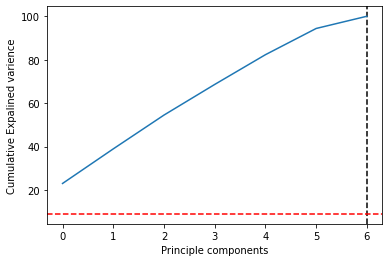

In [123]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here ylabel contains cumulative explained varience and xlabel contains principle components.



Model Building


In [124]:
x_train = df.drop(['Source'],axis=1)
y_train = df.Source
x_train.head()



,Airline,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info
0,4,1,138,150,10,5
1,3,0,31,353,248,5
2,4,1,156,566,148,3
3,6,1,48,633,36,5
4,0,2,198,135,216,5


In [125]:
y_train.head()

0    2
1    3
2    2
3    2
4    0
Name: Source, dtype: int32

In [126]:
x_train.shape


(2671, 6)

In [127]:
y_train.shape


(2671,)

Regressor Methods


In [128]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [129]:
x= df.drop(['Source'],axis=1)
y = df["Source"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [130]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.0
0.1934294858246657
0.03367175148507369
0.19047619047619047
0.0
0.0
0.0
0.0
0.03367175148507369
0.0
0.13883218797250715
0.13468700594029476
0.0
0.23570226039551584
0.03367175148507369
0.03367175148507369
0.0
0.0
0.0
0.0
0.0
0.2693740118805895
0.13883218797250715
0.03367175148507369
0.0
0.0
0.03367175148507369
0.0
0.0
0.0
0.047619047619047616
0.0
0.03367175148507369
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.19047619047619047
0.0
0.13468700594029476
0.03367175148507369
0.13883218797250715
0.0
0.0
0.03367175148507369
0.0
0.0
0.0
0.0
0.0
0.13468700594029476
0.13468700594029476
0.0
0.03367175148507369
0.0
0.0
0.03367175148507369
0.1934294858246657
0.0
0.0
0.0
0.0
0.03367175148507369
0.0
0.0
0.0
0.0
0.0
0.13468700594029476
0.03367175148507369
0.0
0.047619047619047616
0.0
0.0
0.0
0.0
0.0
0.03367175148507369
0.03367175148507369
0.0
0.0
0.03367175148507369
0.19047619047619047
0.03367175148507369
0.0
0.0
0.03367175148507369
0.0
0.0
0.19047619047619047
0.047619047619047616
0.0
0.0
0.13468700594029476
0.0


In [131]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [132]:
y_pred = regressor.predict(x_test)

In [133]:
y_pred

array([3., 2., 2., 0., 2., 2., 3., 2., 0., 2., 2., 3., 0., 1., 0., 2., 0.,
       2., 3., 0., 3., 3., 2., 2., 4., 3., 2., 3., 0., 0., 3., 3., 0., 0.,
       2., 3., 2., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 2., 4., 0., 2.,
       2., 0., 2., 2., 0., 2., 3., 3., 2., 2., 2., 3., 3., 3., 2., 0., 2.,
       3., 3., 2., 0., 2., 2., 2., 2., 2., 0., 2., 3., 0., 3., 2., 2., 0.,
       4., 3., 2., 2., 2., 2., 0., 3., 4., 4., 3., 3., 2., 2., 2., 2., 0.,
       3., 0., 2., 2., 4., 2., 3., 3., 2., 0., 2., 2., 2., 2., 1., 2., 4.,
       2., 2., 2., 0., 4., 2., 2., 0., 2., 0., 2., 2., 3., 0., 2., 2., 3.,
       2., 0., 4., 3., 2., 3., 0., 2., 2., 0., 4., 2., 0., 3., 2., 2., 2.,
       0., 4., 2., 2., 2., 2., 2., 2., 2., 2., 0., 3., 2., 2., 0., 0., 3.,
       0., 0., 3., 2., 2., 2., 2., 4., 3., 2., 3., 2., 3., 3., 2., 2., 4.,
       2., 2., 2., 0., 2., 0., 3., 2., 0., 4., 3., 0., 3., 2., 2., 2., 2.,
       3., 2., 2., 2., 2., 3., 2., 0., 3., 2., 3., 0., 3., 3., 2., 3., 3.,
       3., 0., 3., 2., 3.

In [134]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test Accuracy of DecisionTreeRegressor is 100



In [135]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [136]:
y_pred = regressor.predict(x_test)
y_pred

array([3.  , 2.  , 2.  , 0.  , 2.  , 2.  , 3.  , 2.  , 0.  , 2.  , 2.  ,
       3.  , 0.  , 1.  , 0.36, 2.  , 0.  , 2.  , 3.  , 0.  , 3.  , 3.  ,
       2.  , 2.  , 4.  , 3.  , 2.  , 3.  , 0.08, 0.  , 3.  , 3.  , 0.  ,
       0.  , 2.  , 3.  , 2.  , 3.  , 3.  , 2.  , 3.  , 3.  , 3.  , 3.  ,
       2.  , 3.  , 3.  , 2.  , 3.96, 0.  , 2.  , 2.  , 0.  , 2.  , 2.  ,
       0.  , 2.  , 3.  , 3.  , 2.  , 2.  , 2.  , 3.  , 3.  , 3.  , 2.  ,
       0.  , 2.  , 3.  , 3.  , 2.  , 0.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       0.  , 2.  , 3.  , 0.08, 3.  , 2.  , 2.  , 0.  , 4.  , 3.  , 2.  ,
       2.  , 2.  , 2.  , 0.12, 3.  , 4.  , 4.  , 3.  , 3.  , 2.  , 2.  ,
       2.  , 2.  , 0.  , 3.  , 0.  , 2.  , 2.  , 4.  , 2.  , 3.  , 3.  ,
       2.  , 0.  , 2.  , 2.  , 2.  , 2.  , 1.  , 2.  , 4.  , 2.  , 2.  ,
       2.  , 0.  , 4.  , 2.  , 2.  , 0.  , 2.  , 0.  , 2.  , 2.  , 3.  ,
       0.  , 2.  , 2.  , 3.  , 2.  , 0.  , 4.  , 3.  , 2.  , 3.  , 0.  ,
       2.  , 2.  , 0.  , 4.  , 2.  , 0.  , 3.  , 2.

In [137]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

99.93

The Test Accuracy of RandomForestRegressor 99.93



In [138]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [139]:
y_pred = regressor.predict(x_test)
y_pred

array([ 2.39156429e+00,  2.47769323e+00,  1.81854315e+00,  1.58439838e+00,
        2.12772822e+00,  2.42005904e+00,  2.50283727e+00,  1.78858880e+00,
        2.94385100e-04,  1.80123589e+00,  1.82365824e+00,  2.31288841e+00,
        3.78286413e-01,  6.56622771e-01,  1.75907823e-02,  2.33870178e+00,
        1.57606239e+00,  2.47756692e+00,  2.55282062e+00,  1.57217512e+00,
        2.59507305e+00,  2.37392424e+00,  1.87716307e+00,  1.81913603e+00,
        1.41511216e+00,  2.47813322e+00,  2.34657676e+00,  2.92096106e+00,
        1.72824140e-02,  1.60642151e+00,  2.97967770e+00,  2.93039764e+00,
        1.62631530e+00,  1.57221286e+00,  2.48204590e+00,  2.55919220e+00,
        2.19551866e+00,  2.48499620e+00,  2.60586240e+00,  2.41353557e+00,
        2.72626793e+00,  2.37792607e+00,  2.70315319e+00,  2.62609009e+00,
        2.34086455e+00,  2.33672562e+00,  2.71285018e+00,  1.92511335e+00,
        1.47568543e+00,  5.86937943e-01,  2.48354554e+00,  1.87344952e+00,
        1.60216640e+00,  

In [140]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

38.2

The Test Accuracy of LinearRegression is 38.17



In [141]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [142]:
y_pred = regressor.predict(x_test)
y_pred

array([3, 2, 2, 0, 2, 2, 3, 2, 0, 2, 2, 3, 0, 1, 0, 2, 0, 2, 3, 0, 3, 3,
       2, 2, 4, 3, 2, 3, 0, 0, 3, 3, 0, 0, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 2, 4, 0, 2, 2, 0, 2, 2, 0, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 3, 0, 3, 2, 2, 0, 4, 3, 2,
       2, 2, 2, 0, 3, 4, 4, 3, 3, 2, 2, 2, 2, 0, 3, 0, 2, 2, 4, 2, 3, 3,
       2, 0, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 0, 4, 2, 2, 0, 2, 0, 2, 2, 3,
       0, 2, 2, 3, 2, 0, 4, 3, 2, 3, 0, 2, 2, 0, 4, 2, 0, 3, 2, 2, 2, 0,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 3, 0, 0, 3, 2, 2, 2,
       2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 2, 0, 2, 0, 3, 2, 0, 4, 3,
       0, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 0, 3, 2, 3, 0, 3, 3, 2, 3,
       3, 3, 0, 3, 2, 3, 3, 0, 2, 0, 3, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 2, 3, 0, 3, 4, 2, 2, 3, 2, 3, 2, 0, 2, 2, 2, 4, 2, 0, 4, 2,
       3, 0, 4, 2, 2, 2, 1, 2, 3, 2, 0, 3, 2, 2, 4, 3, 2, 3, 0, 3, 2, 0,
       1, 3, 3, 3, 0, 0, 3, 2, 3, 3, 4, 3, 2, 3, 2,

In [143]:
nb_accuracy = round(regressor.score(x_train,y_train)*100,2)
nb_accuracy

99.89

The Test Accuracy of GaussianNB is 99.89



In [144]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [145]:
y_pred = regressor.predict(x_test)
y_pred

array([2.03306799, 2.09998723, 2.09857033, 2.09992572, 1.84646294,
       2.08706214, 1.98040359, 2.10534042, 2.02150972, 2.00984571,
       2.09490448, 2.0561183 , 1.85225443, 1.94877978, 1.94774349,
       2.06231829, 1.79917123, 2.09031934, 2.07080531, 2.03068773,
       2.03639358, 1.99188056, 1.92072209, 1.9921784 , 2.0267423 ,
       1.98711203, 2.04479948, 2.09272895, 1.96076102, 2.05099768,
       2.22420265, 2.32589878, 1.90022077, 2.01347951, 2.10873452,
       2.06870275, 2.07221099, 1.94070107, 1.81546118, 2.07119356,
       2.2379639 , 1.70329326, 2.09090363, 2.0482857 , 2.05174264,
       1.95166152, 2.13712083, 2.03802011, 2.28501545, 2.06484124,
       2.10734375, 1.83302833, 2.03003228, 2.10340134, 1.87138853,
       1.57139761, 2.09118429, 1.98711203, 2.06958059, 2.10837451,
       2.10318239, 2.11471846, 1.91260686, 1.91740856, 2.22559309,
       2.09108238, 1.64625104, 2.20627945, 2.00648456, 2.32175517,
       1.9086553 , 1.91911501, 2.1214287 , 2.0562113 , 2.09749

In [146]:
svm_accuracy = round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

7.19

The Test Accuracy of SVR is 7.19



In [147]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [148]:
y_pred = regressor.predict(x_test)
y_pred

array([3. , 2. , 2. , 0.4, 2. , 2. , 1.8, 2. , 1.2, 2. , 2. , 3. , 1.6,
       1. , 1.6, 2. , 0. , 2.2, 3. , 0. , 1.8, 3. , 2. , 2. , 4. , 3. ,
       2.2, 2.6, 1.8, 0. , 2. , 3.2, 0. , 0. , 2. , 3. , 2. , 1.6, 3. ,
       2. , 3. , 1.6, 2. , 3. , 1.4, 3. , 2.4, 2. , 3.2, 2.2, 2. , 2. ,
       0. , 2. , 2. , 0. , 2. , 3. , 3. , 2. , 2. , 2. , 2.4, 2.8, 2. ,
       2. , 1.2, 2. , 2.2, 2.4, 2. , 0. , 2. , 2. , 2. , 2. , 2. , 0.2,
       2. , 2.4, 1.8, 2.8, 2. , 2. , 0.4, 4. , 3. , 2.8, 2. , 2. , 2. ,
       2.6, 2.4, 4. , 4. , 3. , 2.4, 2.6, 2. , 2. , 2. , 0.6, 1.8, 0. ,
       2. , 2. , 4. , 1.2, 1.2, 1.8, 2. , 1.8, 2. , 2. , 2. , 2. , 2.2,
       2.2, 4. , 2. , 1.2, 2. , 0.4, 4. , 2. , 2. , 2.4, 2. , 2.4, 2.2,
       2. , 2.4, 0. , 2. , 2. , 2.8, 2. , 0. , 4. , 3.2, 2. , 2. , 0.2,
       2. , 2. , 0.4, 4. , 2. , 0. , 0.6, 1.2, 2.2, 3. , 0. , 4. , 2. ,
       0.8, 2. , 1.6, 2.2, 2.6, 2. , 2. , 0. , 3. , 2. , 1.4, 2.6, 0. ,
       3. , 0. , 0. , 3. , 2. , 2. , 2. , 2. , 2. , 0. , 2. , 2.

In [149]:
knn_accuracy = round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

75.96

The Test Accuracy of KNN regressor is 75.96



Cross validation methods


In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9957992246521379


In [152]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9962092633811535


In [153]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.05947155922522425


In [154]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.363683200622842


In [155]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6281708177209495


In [156]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9973789772130631


Hyperparameter Tunnings


In [157]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [158]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [159]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 5}

Evalute The Final Model


In [160]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

97.26697039922176


Saving The Model


In [164]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Prediction Method


In [165]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[3. 2. 2. 0. 2. 2. 3. 2. 0. 2. 2. 3. 0. 1. 0. 2. 0. 2. 3. 0. 3. 3. 2. 2.
 4. 3. 2. 3. 0. 0. 3. 3. 0. 0. 2. 3.]
[3 2 2 0 2 2 3 2 0 2 2 3 0 1 0 2 0 2 3 0 3 3 2 2 4 3 2 3 0 0 3 3 0 0 2 3]


The train and test data is balanced most regressor methods hit the 97% accuracy with the datset.

